# Data plotting and analysis

In this notebook we show the plotting of de example Dual Regression (DR) maps and the extraction of the values from the DR maps for analysis

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from nilearn import plotting
from nilearn import image
from nilearn.input_data import MultiNiftiMasker
import nibabel as nib
import numpy as np
import pandas as pd
import scipy.stats as stats
import os

/home/traaffneu/roevro/.conda/envs/Mouse_QC/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [13]:
#move to data folder
os.chdir('/project/4180000.23/DR_ISMRM/') 

In [42]:
#load example DR maps
DR_0_435269= image.get_data('vol0009.nii.gz')

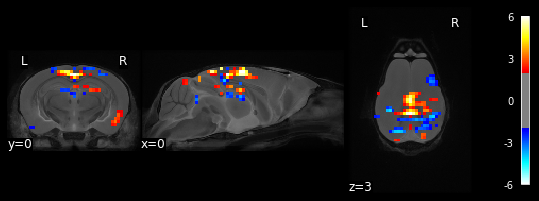

In [49]:
plotting.plot_stat_map(stat_map_img= 'vol0009.nii.gz', 
                       bg_img= 'DSURQE_100micron_average.nii.gz', 
                       display_mode='ortho',
                       cut_coords=(0,0,3), 
                       threshold= 2,
                       vmax= 6, 
                       draw_cross=False)

In [3]:
#Create a binary version of the ICA maps, for masking purposes
canica = image.load_img('canica_resting_state.nii.gz')
canica_mask= image.math_img('img > 0', img=canica)
canica_mask.to_filename('canica_resting_state_binary.nii.gz')

In [ ]:
#Split the binary ICA maps into the single volumes, this can be done with FSL's function: fslsplit
fslsplit canica_resting_state_binary.nii.gz canica_binary_ -t

In [5]:
#use MultiNiftiMasker to extract values from the DR maps and save to csv files. For this purpose, the DR_maps from all
#subjects were copied into a single folder, namely /DR_nii. The csv files will be saved in another folder, namely /DR_csv
for x in range(19):
    if x <10:
        masker= MultiNiftiMasker(mask_img=f'canica_binary/canica_binary_000{x}.nii.gz')
    else:
        masker= MultiNiftiMasker(mask_img=f'canica_binary/canica_binary_00{x}.nii.gz')
    masker.fit()

    sig3008 = masker.transform_imgs('DR_nii/sub-3008*')
    sig3014 = masker.transform_imgs('DR_nii/sub-3014*')

    sig3008_means = []
    sig3014_means = []

    for y in range(10):
        sig3008_means.append(sig3008[y][x].mean())
        sig3014_means.append(sig3014[y][x].mean())

    np.savetxt(f'DR_csv/sig3008_ICA{x}_means.csv', sig3008_means, delimiter=',')
    np.savetxt(f'DR_csv/sig3014_ICA{x}_means.csv', sig3014_means, delimiter=',')

In [6]:
#Read csv files with extracted values from the DR maps and combine into dataframe
means = pd.DataFrame(data=[1,2,3,4,5,6,7,8,9,10],columns=['Foo'])

for x in range(19):
    means_3008 = pd.read_csv(f'DR_csv/sig3008_ICA{x}_means.csv', header= None, names=[f'3008_ICA{x}'])
    means = means.join(means_3008)

    means_3014 = pd.read_csv(f'DR_csv/sig3014_ICA{x}_means.csv', header= None, names=[f'3014_ICA{x}'])
    means = means.join(means_3014)

means.head()

,Foo,3008_ICA0,3014_ICA0,3008_ICA1,3014_ICA1,3008_ICA2,3014_ICA2,3008_ICA3,3014_ICA3,3008_ICA4,...,3008_ICA14,3014_ICA14,3008_ICA15,3014_ICA15,3008_ICA16,3014_ICA16,3008_ICA17,3014_ICA17,3008_ICA18,3014_ICA18
0,1,8.589991,4.683581,3.511487,6.895312,1.928726,2.562977,1.511686,3.128943,4.180466,...,1.927011,3.456805,1.559322,5.855691,2.228122,2.792538,2.749698,5.631944,2.197799,6.914658
1,2,2.156778,3.559905,2.105747,5.011460,1.558691,2.327535,1.467318,3.019561,4.776797,...,1.715762,2.210164,1.832180,3.602810,1.969913,2.492167,3.404106,4.007150,2.857771,4.767912
2,3,3.239585,5.074548,2.655418,5.216878,1.615351,2.501519,1.891343,2.205514,4.806203,...,2.169283,2.767746,2.584980,3.377243,2.089965,2.423580,3.543947,2.952059,3.421042,3.954869
3,4,1.969053,5.678791,2.433366,5.556014,1.658629,2.619082,1.789793,2.320813,5.484529,...,1.972899,2.417844,2.296343,3.270453,2.814437,2.455992,3.923282,2.702650,3.274439,3.493643
4,5,3.875920,3.118523,5.506013,7.100435,4.570578,3.624143,3.675794,2.992379,7.888081,...,3.388110,3.375671,6.155171,5.364440,5.162200,2.288839,4.747504,3.996863,5.250677,3.535043


In [7]:
#Drop Foo column (this was made as a placeholder)
means.drop(['Foo'], axis=1, inplace=True)
means.head()

,3008_ICA0,3014_ICA0,3008_ICA1,3014_ICA1,3008_ICA2,3014_ICA2,3008_ICA3,3014_ICA3,3008_ICA4,3014_ICA4,...,3008_ICA14,3014_ICA14,3008_ICA15,3014_ICA15,3008_ICA16,3014_ICA16,3008_ICA17,3014_ICA17,3008_ICA18,3014_ICA18
0,8.589991,4.683581,3.511487,6.895312,1.928726,2.562977,1.511686,3.128943,4.180466,7.023993,...,1.927011,3.456805,1.559322,5.855691,2.228122,2.792538,2.749698,5.631944,2.197799,6.914658
1,2.156778,3.559905,2.105747,5.011460,1.558691,2.327535,1.467318,3.019561,4.776797,4.868022,...,1.715762,2.210164,1.832180,3.602810,1.969913,2.492167,3.404106,4.007150,2.857771,4.767912
2,3.239585,5.074548,2.655418,5.216878,1.615351,2.501519,1.891343,2.205514,4.806203,4.305279,...,2.169283,2.767746,2.584980,3.377243,2.089965,2.423580,3.543947,2.952059,3.421042,3.954869
3,1.969053,5.678791,2.433366,5.556014,1.658629,2.619082,1.789793,2.320813,5.484529,4.644551,...,1.972899,2.417844,2.296343,3.270453,2.814437,2.455992,3.923282,2.702650,3.274439,3.493643
4,3.875920,3.118523,5.506013,7.100435,4.570578,3.624143,3.675794,2.992379,7.888081,4.785119,...,3.388110,3.375671,6.155171,5.364440,5.162200,2.288839,4.747504,3.996863,5.250677,3.535043


In [8]:
#Save the dataframe
means.to_csv('DR_means_all.csv', index=False)